# DSC530 Final - Wine Quality

Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

Question: what impacts wine quality?

My features of interest: 
* pH
* sulphates
* alcohol
* residual sugar
* fixed acidity

### Load data

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [ ]:
wine_quality = pd.read_csv('winequality-red.csv', delimiter=';')

In [ ]:
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Histogram of wine quality

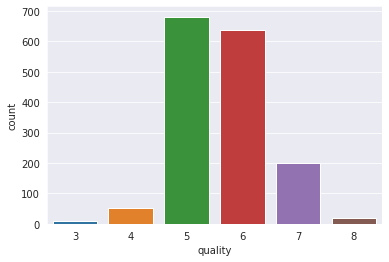

In [ ]:
sns.countplot(data=wine_quality,x='quality');

PMF of wine quality

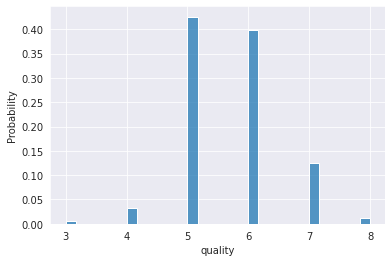

In [ ]:
sns.histplot(data=wine_quality,x='quality', stat="probability");

## Histograms and PMFs of 5 variables 

(pH, sulphates, alcohol, residual sugar, fixed acidity)

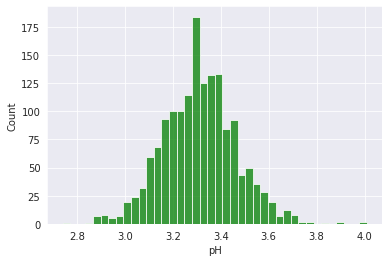

In [ ]:
sns.histplot(data=wine_quality,x='pH', color='g');

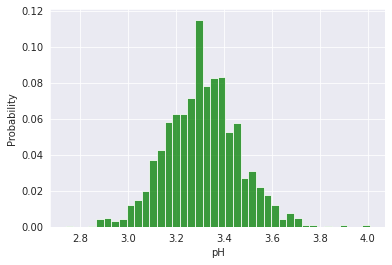

In [ ]:
sns.histplot(data=wine_quality,x='pH', stat="probability", color='g');

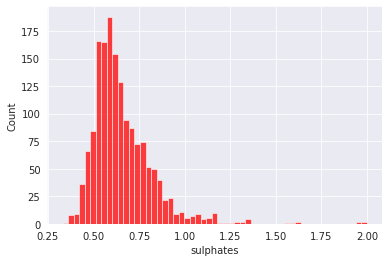

In [ ]:
sns.histplot(data=wine_quality,x='sulphates', stat="count", color='r');

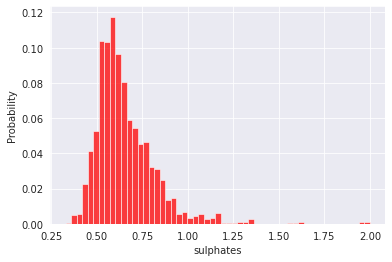

In [ ]:
sns.histplot(data=wine_quality,x='sulphates', stat="probability", color='r');

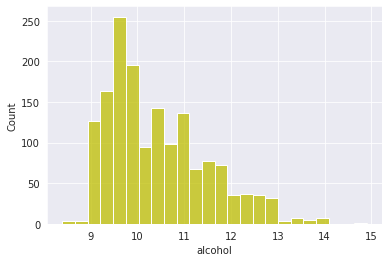

In [ ]:
sns.histplot(data=wine_quality,x='alcohol', stat="count", color='y');

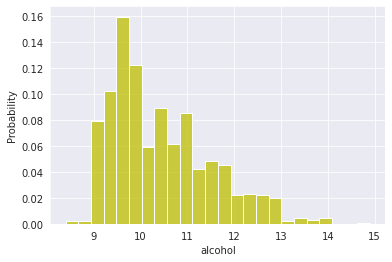

In [ ]:
sns.histplot(data=wine_quality,x='alcohol', stat="probability", color='y');

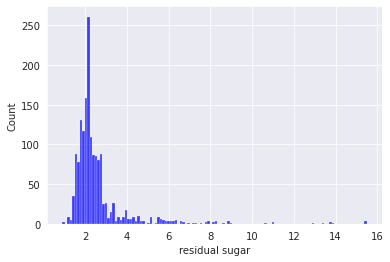

In [ ]:
sns.histplot(data=wine_quality,x='residual sugar', stat="count", color='b');

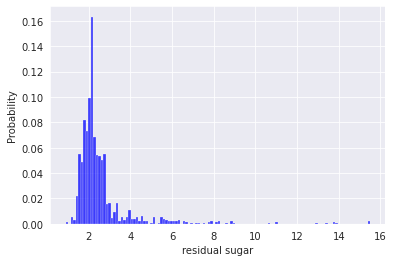

In [ ]:
sns.histplot(data=wine_quality,x='residual sugar', stat="probability", color='b');

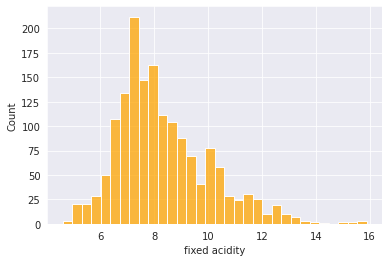

In [ ]:
sns.histplot(data=wine_quality,x='fixed acidity', stat="count", color='orange');

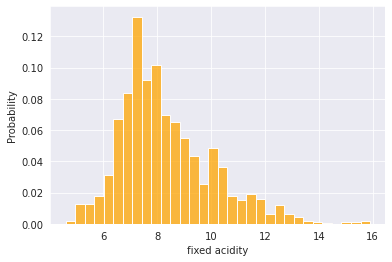

In [ ]:
sns.histplot(data=wine_quality,x='fixed acidity', stat="probability", color='orange');

### Descriptive statistics

(Mean, Mode, Spread, Tails)

In [ ]:
def print_descriptive_statistics(var):
  print(f'Here is the mean: {var.mean()}')
  print(f'Here is the mode: {var.mode()[0]}')
  print(f'Here is the spread: {var.var()}') # use variance to describe spread
  print(f'Here is the left tail: {var.min()}')
  print(f'Here is the right tail: {var.max()}')

In [ ]:
print_descriptive_statistics(wine_quality['pH'])

Here is the mean: 3.3111131957473416
Here is the mode: 3.3
Here is the spread: 0.023835180545412844
Here is the left tail: 2.74
Here is the right tail: 4.01


In [ ]:
print_descriptive_statistics(wine_quality['sulphates'])

Here is the mean: 0.6581488430268917
Here is the mode: 0.6
Here is the spread: 0.028732616129761954
Here is the left tail: 0.33
Here is the right tail: 2.0


In [ ]:
print_descriptive_statistics(wine_quality['alcohol'])

Here is the mean: 10.422983114446529
Here is the mode: 9.5
Here is the spread: 1.1356473950004737
Here is the left tail: 8.4
Here is the right tail: 14.9


In [ ]:
print_descriptive_statistics(wine_quality['residual sugar'])

Here is the mean: 2.53880550343965
Here is the mode: 2.0
Here is the spread: 1.9878971329859634
Here is the left tail: 0.9
Here is the right tail: 15.5


In [ ]:
print_descriptive_statistics(wine_quality['fixed acidity'])

Here is the mean: 8.31963727329581
Here is the mode: 7.2
Here is the spread: 3.0314163889978167
Here is the left tail: 4.6
Here is the right tail: 15.9


## Compare two scenarios using PMFs

Let's explore that variable 'alcohol' to see how it relates to high wine quality (wine quality > 5) and low wine quality (wine quality <= 5)

In [ ]:
# Split the DataFrame based on the 'wine_quality' column
low_quality = wine_quality[wine_quality['quality'] <= 4]
high_quality = wine_quality[wine_quality['quality'] > 4]

In [ ]:
low_quality.alcohol.value_counts().sort_values

<bound method Series.sort_values of 9.60     6
11.00    5
10.90    4
9.80     4
10.00    4
10.40    3
11.20    3
9.70     3
9.00     3
9.20     3
11.40    2
11.50    2
9.40     2
9.30     2
9.90     2
9.10     2
10.70    1
13.10    1
11.30    1
10.50    1
8.40     1
11.80    1
12.00    1
11.10    1
10.20    1
10.10    1
10.30    1
9.95     1
9.05     1
Name: alcohol, dtype: int64>

In [ ]:
high_quality.alcohol.value_counts().sort_values

<bound method Series.sort_values of 9.500000     139
9.400000     101
9.800000      74
9.200000      69
10.500000     66
            ... 
13.566667      1
11.950000      1
9.233333       1
9.250000       1
10.750000      1
Name: alcohol, Length: 63, dtype: int64>

In [ ]:
print_descriptive_statistics(low_quality.alcohol)

Here is the mean: 10.215873015873019
Here is the mode: 9.6
Here is the spread: 0.8430504352278546
Here is the left tail: 8.4
Here is the right tail: 13.1


In [ ]:
print_descriptive_statistics(high_quality.alcohol)

Here is the mean: 10.431477864583334
Here is the mode: 9.5
Here is the spread: 1.1463727764912461
Here is the left tail: 8.4
Here is the right tail: 14.9


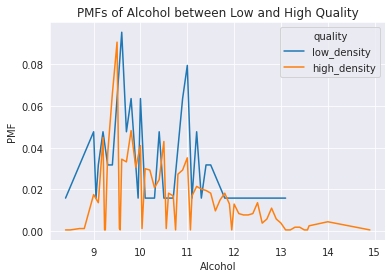

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute probability density of 'alcohol' in low_quality and high_quality
low_density = low_quality['alcohol'].value_counts(normalize=True).sort_index()
high_density = high_quality['alcohol'].value_counts(normalize=True).sort_index()

# Combine the two dataframes into a single dataframe
density_df = pd.concat([low_density, high_density], axis=1, keys=['low', 'high']).reset_index()
density_df.columns = ['alcohol', 'low_density', 'high_density']

# Melt the dataframe to convert the density columns to a single 'density' column
density_df = pd.melt(density_df, id_vars=['alcohol'], var_name='quality', value_name='density')

# Plot the PMFs using Seaborn's lineplot function
sns.lineplot(data=density_df, x='alcohol', y='density', hue='quality')

# Add labels and title to the plot
plt.xlabel('Alcohol')
plt.ylabel('PMF')
plt.title('PMFs of Alcohol between Low and High Quality')

# Display the plot
plt.show()

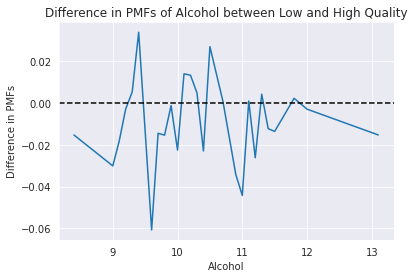

In [ ]:
# Compute probability density of 'alcohol' in low_quality and high_quality
low_density = low_quality['alcohol'].value_counts(normalize=True).sort_index()
high_density = high_quality['alcohol'].value_counts(normalize=True).sort_index()

# Compute the difference in probability density
diff_density = high_density - low_density

# Plot the difference in PMFs using sns.lineplot
sns.lineplot(x=diff_density.index, y=diff_density.values)

# Add labels and title to the plot
plt.xlabel('Alcohol')
plt.ylabel('Difference in PMFs')
plt.title('Difference in PMFs of Alcohol between Low and High Quality')

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--')

# Display the plot
plt.show()


## Create CDF of a variable

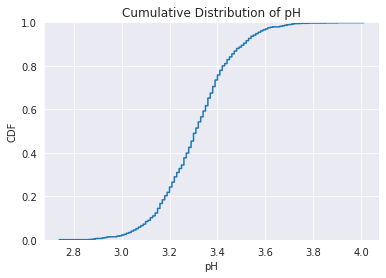

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a CDF plot of the 'pH' column
sns.ecdfplot(data=wine_quality, x='pH')

# Add labels and title to the plot
plt.xlabel('pH')
plt.ylabel('CDF')
plt.title('Cumulative Distribution of pH')

# Display the plot
plt.show()


## Create analytical plot

Compare a CDF of pH to normal distribution

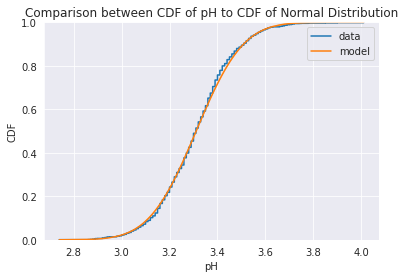

In [ ]:
import numpy as np
import scipy.stats as stats

# Calculate the mean and variance of the 'pH' column
mean = wine_quality['pH'].mean()
variance = wine_quality['pH'].var()

# Create a normal distribution with the same mean and variance as the 'pH' column
normal_dist = stats.norm(loc=mean, scale=np.sqrt(variance))

# Create the plot
fig, ax = plt.subplots()
sns.ecdfplot(data=wine_quality, x='pH', ax=ax, label='data')
sns.lineplot(x=np.sort(wine_quality['pH']), y=normal_dist.cdf(np.sort(wine_quality['pH'])), ax=ax, label='model')

# Add labels and title to the plot
plt.xlabel('pH')
plt.ylabel('CDF')
plt.title('Comparison between CDF of pH to CDF of Normal Distribution')

# Add a legend
ax.legend()

# Display the plot
plt.show()


# Create scatterplot of two variables

pH and wine quality

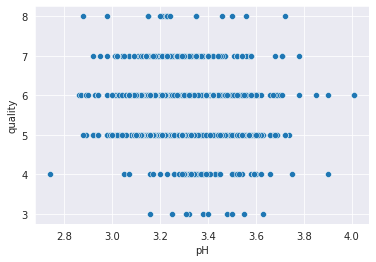

In [ ]:
# create scatterplot between pH and wine_quality

sns.scatterplot(data=wine_quality, x='pH', y='quality');

In [ ]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    # return Corr(xranks, yranks)
    return np.corrcoef(xranks, yranks)[0,1]

Covariance

In [ ]:
pH = wine_quality['pH']
quality = wine_quality['quality']
Cov(pH, quality)

-0.007193320872449591

Pearson Correlation

In [ ]:
np.corrcoef(pH, quality)[0,1]

-0.05773139120538215

Spearman Correlation

In [ ]:
SpearmanCorr(pH, quality)

-0.043671934788928383

The difference between them suggests a non-linear relationship.

# Hypothesis Testing

Test for whether low quality or high quality wines are affected by alcohol content

In [ ]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkstats2.py
Downloaded thinkplot.py


In [ ]:
import numpy as np
import random
import thinkstats2
import thinkplot

In [ ]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

Compute p-value of an observed difference in means (permutation test)

In [ ]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [ ]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

Downloaded nsfg.py
Downloaded first.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [ ]:
data = low_quality.alcohol.values, high_quality.alcohol.values

In [ ]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.12

Here's the distrubution of the test statistic (the difference in means) over many simulated samples:

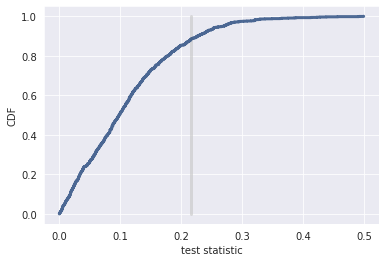

In [ ]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [ ]:
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [ ]:
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.94

# Regression **Analysis**

Regression between dependent variable (fixed_acidity) and explanatory variable (quality)

In [ ]:
fixed_acidity = wine_quality['fixed acidity']
quality = wine_quality['quality']

The following function computes the intercept and slope of the least squares fit.

In [ ]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

Here's the least squares fit to wine quality as a function of fixed_acidity.

In [ ]:
inter, slope = LeastSquares(fixed_acidity, quality)
inter, slope

(5.157321868924812, 0.057538643743881186)

In [ ]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [ ]:
fit_xs, fit_ys = FitLine(fixed_acidity, inter, slope)

Scatterplot with fitted line

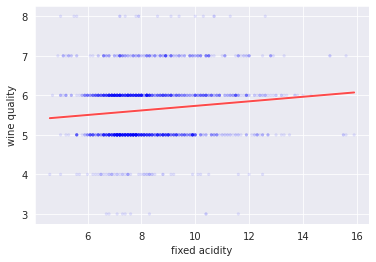

In [ ]:
thinkplot.Scatter(fixed_acidity, quality, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="fixed acidity",
                 ylabel='wine quality',
                #  axis=[10, 45, 0, 15],
                 legend=False)

Residuals

In [ ]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [ ]:
wine_quality['residual'] = Residuals(fixed_acidity, quality, inter, slope)

In [ ]:
max(fixed_acidity)

15.9

In [ ]:
bins = np.arange(4, 16, 2)
indices = np.digitize(fixed_acidity, bins)
groups = wine_quality.groupby(indices)

fixed_acidity_means = [group["fixed acidity"].mean() for _, group in groups][1:-1]
fixed_acidity_means

[7.138654353562006, 8.794477317554241, 10.76238095238095, 12.650877192982456]

In [ ]:
cdfs = [thinkstats2.Cdf(group.residual) for _, group in groups][1:-1]

In [ ]:
def PlotPercentiles(age_means, cdfs):
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(age_means, weight_percentiles, label=label)

The following figure shows the 25th, 50th, and 75th percentiles.

Curvature in the residuals suggests a non-linear relationship.

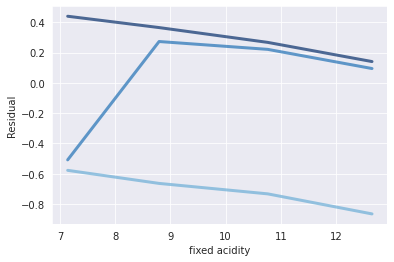

In [ ]:
PlotPercentiles(fixed_acidity_means, cdfs)

thinkplot.Config(xlabel="fixed acidity",
                 ylabel='Residual',
                #  xlim=[10, 45],
                 )

Sampling distribution

In [ ]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

def ResampleRows(df):
    return SampleRows(df, len(df), replace=True)

In [ ]:
def SamplingDistributions(live, iters=101):
    t = []
    for _ in range(iters):
        sample = ResampleRows(live)
        fixed_acidity = sample['fixed acidity']
        quality = sample['quality']
        estimates = LeastSquares(fixed_acidity, quality)
        t.append(estimates)

    inters, slopes = zip(*t)
    return inters, slopes

In [ ]:
inters, slopes = SamplingDistributions(wine_quality, iters=1001)

The following function takes a list of estimates and prints the mean, standard error, and 90% confidence interval.

In [ ]:
def Summarize(estimates, actual=None):
    mean = Mean(estimates)
    stderr = Std(estimates, mu=actual)
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.ConfidenceInterval(90)
    print('mean, SE, CI', mean, stderr, ci)

In [ ]:
Summarize(inters)

mean, SE, CI 5.162949794239317 0.10137024880083251 (4.997705204656171, 5.329442797084013)


Here is the summary for slope

In [ ]:
Summarize(slopes)

mean, SE, CI 0.05675914982325422 0.012035763872048678 (0.03776807425927151, 0.076482546140188)


Visualizing uncertainty

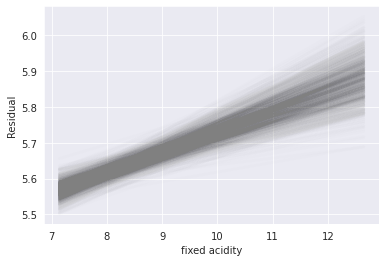

In [ ]:
for slope, inter in zip(slopes, inters):
    fxs, fys = FitLine(fixed_acidity_means, inter, slope)
    thinkplot.Plot(fxs, fys, color='gray', alpha=0.01)
    
thinkplot.Config(xlabel="fixed acidity",
                 ylabel='Residual',
                #  xlim=[10, 45],
                 )

In [ ]:
def PlotConfidenceIntervals(xs, inters, slopes, percent=90, **options):
    fys_seq = []
    for inter, slope in zip(inters, slopes):
        fxs, fys = FitLine(xs, inter, slope)
        fys_seq.append(fys)

    p = (100 - percent) / 2
    percents = p, 100 - p
    low, high = thinkstats2.PercentileRows(fys_seq, percents)
    thinkplot.FillBetween(fxs, low, high, **options)

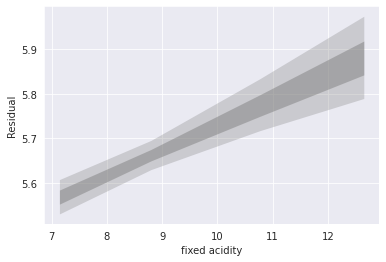

In [ ]:
PlotConfidenceIntervals(fixed_acidity_means, inters, slopes, percent=90, 
                        color='gray', alpha=0.3, label='90% CI')
PlotConfidenceIntervals(fixed_acidity_means, inters, slopes, percent=50,
                        color='gray', alpha=0.5, label='50% CI')

thinkplot.Config(xlabel="fixed acidity",
                 ylabel='Residual',
                #  xlim=[10, 45],
                 )

Coefficient of determination

The coefficient compares the variance of the residuals to the variance of the dependent variable.

In [ ]:
def CoefDetermination(ys, res):
    return 1 - Var(res) / Var(ys)

In [ ]:
inter, slope = LeastSquares(fixed_acidity, quality)
res = Residuals(fixed_acidity, quality, inter, slope)
r2 = CoefDetermination(quality, res)
r2

0.015388811647711664

R2  is very small, indicating that the fixed acidity predicts a small part of the variance in wine quality.

Pearson correlation

In [ ]:
rho = thinkstats2.Corr(fixed_acidity, quality)
rho

0.12405164911322424

Confirm that $R^2 = \rho^2$.

In [ ]:
np.isclose(rho**2, r2)

True

To express predictive power, I compared the standard deviation of the residuals to the standard deviation of the dependent variable, as a measure RMSE if you try to guess wine quality with and without taking into account fixed acidity.

In [ ]:
print('Std(ys)', Std(quality))
print('Std(res)', Std(res))

Std(ys) 0.8073168769639517
Std(res) 0.8010809694681061


## Hypothesis testing with slopes

Here's a `HypothesisTest` that uses permutation to test whether the observed slope is statistically significant.

In [ ]:
class SlopeTest(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        ages, weights = data
        _, slope = thinkstats2.LeastSquares(ages, weights)
        return slope

    def MakeModel(self):
        _, weights = self.data
        self.ybar = weights.mean()
        self.res = weights - self.ybar

    def RunModel(self):
        ages, _ = self.data
        weights = self.ybar + np.random.permutation(self.res)
        return ages, weights

And it is.

In [ ]:
ht = SlopeTest((fixed_acidity, quality))
pvalue = ht.PValue()
pvalue

0.0

Under the null hypothesis, the largest slope we observe after 1000 tries is substantially less than the observed value.

In [ ]:
ht.actual, ht.MaxTestStat()

(0.057538643743881186, 0.041953005832433825)

We can also use resampling to estimate the sampling distribution of the slope.

In [ ]:
sampling_cdf = thinkstats2.Cdf(slopes)

The distribution of slopes under the null hypothesis, and the sampling distribution of the slope under resampling, have the same shape, but one has mean at 0 and the other has mean at the observed slope.

To compute a p-value, we can count how often the estimated slope under the null hypothesis exceeds the observed slope, or how often the estimated slope under resampling falls below 0.

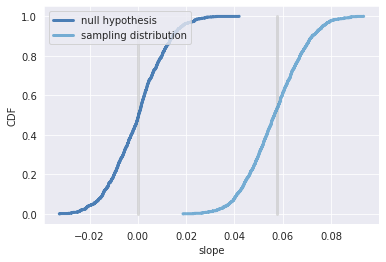

In [ ]:
thinkplot.PrePlot(2)
thinkplot.Plot([0, 0], [0, 1], color='0.8')
ht.PlotCdf(label='null hypothesis')

thinkplot.Cdf(sampling_cdf, label='sampling distribution')

thinkplot.Config(xlabel='slope',
                   ylabel='CDF',
                  #  xlim=[-0.03, 0.03],
                   legend=True, loc='upper left')

p-value from the sampling distribution

In [ ]:
pvalue = sampling_cdf[0]
pvalue

0

## Resampling with weights

Resampling provides a convenient way to take into account the sampling weights associated with respondents in a stratified survey design.

The following function resamples rows with probabilities proportional to weights.

In [ ]:
def ResampleRowsWeighted(df, column='finalwgt'):
    weights = df[column]
    cdf = thinkstats2.Cdf(dict(weights))
    indices = cdf.Sample(len(weights))
    sample = df.loc[indices]
    return sample

estimate the mean wine quality and compute SE and CI.

In [ ]:
iters = 100
estimates = [ResampleRowsWeighted(wine_quality, column='quality').quality.mean()
             for _ in range(iters)]
Summarize(estimates)

mean, SE, CI 5.752026266416511 0.021228587914231024 (5.714196372732958, 5.788617886178862)


And here's the same calculation if we ignore the weights

In [ ]:
estimates = [thinkstats2.ResampleRows(wine_quality).quality.mean()
             for _ in range(iters)]
Summarize(estimates)

mean, SE, CI 5.638223889931208 0.02121881822662022 (5.60100062539087, 5.6729205753595995)


The difference is non-negligible, which suggests that there are differences in wine quality between the strata in the survey.